## Tarea Aplicar Photometria de apertura a todas las imagenes

In [1]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
from astropy.visualization import ImageNormalize, ZScaleInterval

from astropy import units as u
from astropy.coordinates import SkyCoord

import glob

#WCS para mapear el pixel a la coordenada en la esfera celeste.
from astropy.wcs import WCS

##### Funciones Generales

acortar getdata

In [2]:
def dat(datapath):
    return fits.getdata(datapath)

plotear imagen

In [3]:
def plot(image):
    interval = ZScaleInterval()
    norm = ImageNormalize( image, interval=ZScaleInterval() )
    plt.imshow( image, norm=norm, origin='lower' )
    

In [39]:
def plotmulti(xy, dir):
    
    for i in range(0,len(xy),2):
        interval = ZScaleInterval()
        #print(i/2)
        norm = ImageNormalize( dat(dir[int(i/2)]), interval=ZScaleInterval() )
        plt.subplots(1)
        plt.imshow( dat(dir[int(i/2)])[(int(xy[i+1])-33):(int(xy[i+1])+10),(int(xy[i])-25):(int(xy[i])+10)], norm=norm, origin='lower' )
        plt.colorbar()


In [19]:
def CoordPixel(corde):
    yx=[]
    for i, f in enumerate(corde):
        cielo=corde[i].pixel_to_world(1528, 1021)
        cielo=SkyCoord(cielo.to_string('hmsdms'))
        yx=np.append(yx, corde[i].world_to_pixel(cielo))
        
        #print(yx)
    return yx
    #coord_cielo=cordenadas[0].pixel_to_world(1528, 1021)
    #coord_cielo=SkyCoord(coord_cielo.to_string('hmsdms'))
    #cordenadas[0].world_to_pixel(coord_cielo)

Guardar cordenadas de imagenes en una carpeta

In [6]:
def coord(dir):
    matriz=[]
    for i in dir:
        header=fits.getheader(i, ext=1)
        wcs=WCS(header)
        matriz=np.append(matriz, wcs)
    #print(matriz)
    return matriz

Lista de las imagenes

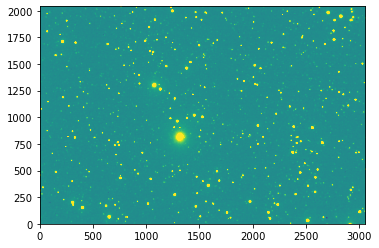

In [7]:
path='F:/Practica/Imagenes/TrES1'
contenido=glob.glob( os.path.join(path, '*.fz') )

plot(dat(contenido[0]))

In [8]:
cordenadas=coord(contenido)

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Prueba Guardado cordenadas wcs

In [9]:
cordenadas[0]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 286.044248713  36.6315657759  
CRPIX : 1527.5  1021.5  
CD1_1 CD1_2  : -1.79685839683e-07  0.000158500821764  
CD2_1 CD2_2  : -0.000158500821764  -1.79685839683e-07  
NAXIS : 3054  2042

In [10]:
#centroPix=(1528, 1021)
coord_cielo=cordenadas[0].pixel_to_world(1528, 1021)
coord_cielo

<SkyCoord (ICRS): (ra, dec) in deg
    (286.04434713, 36.63132793)>

In [11]:
coord_cielo.to_string('hmsdms')

'19h04m10.64331183s +36d37m52.78056522s'

In [12]:
coord_cielo=SkyCoord(coord_cielo.to_string('hmsdms'))

In [13]:
y, x =cordenadas[0].world_to_pixel(coord_cielo)

In [14]:
print(x,y)

1021.0000001008269 1528.0000000038563


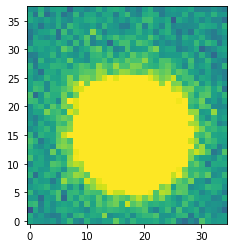

In [29]:
interval = ZScaleInterval()
norm = ImageNormalize( dat(contenido[0]), interval=ZScaleInterval() )
plt.subplots(1)
plt.imshow( dat(contenido[0])[(int(x)-33):(int(x)+5),(int(y)-25):(int(y)+10)], norm=norm, origin='lower' )


In [16]:
#CordenadasCielo=CoordCielo(cordenadas)
#CordenadasCielo[0]

NameError: name 'CoordCielo' is not defined

In [20]:
xy=CoordPixel(cordenadas)
len(xy)/2

139.0

In [ ]:
xy[1]

In [ ]:
xy[50]

In [ ]:
len(cordenadas)

In [ ]:
for i in range(0,10,2):
    #i+=5
    print(i)

C:\Users\Saike\AppData\Local\Temp/ipykernel_12204/2869622004.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(1)


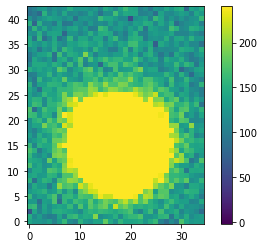

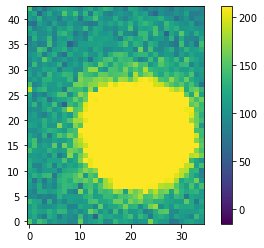

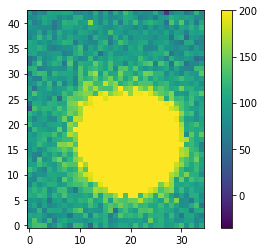

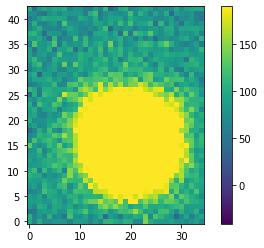

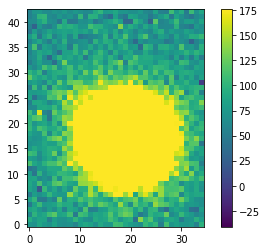

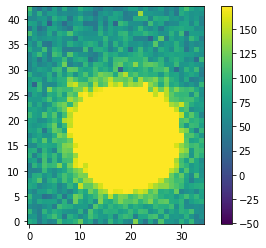

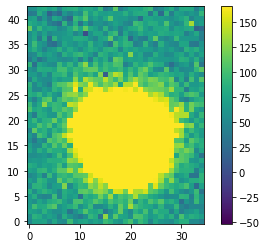

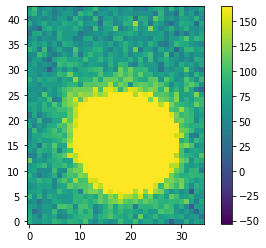

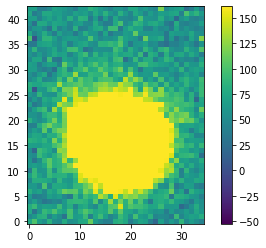

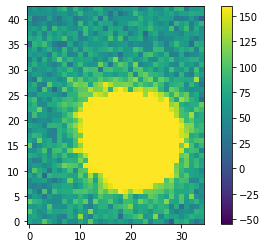

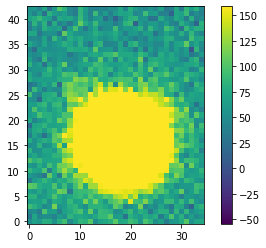

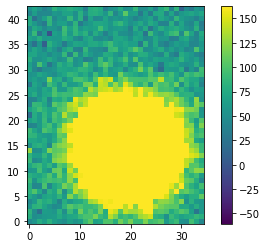

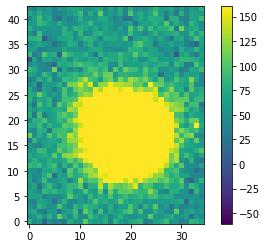

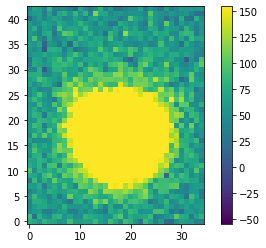

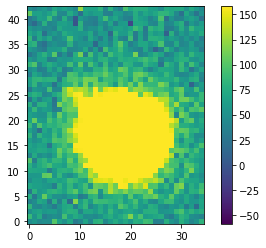

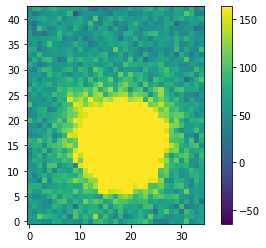

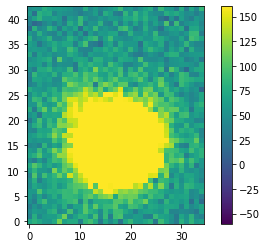

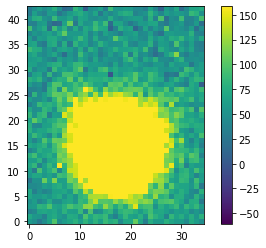

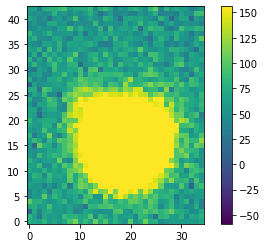

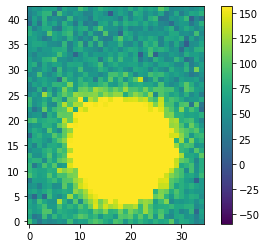

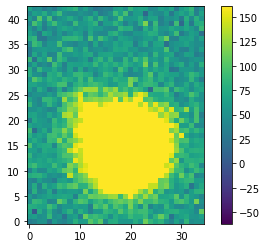

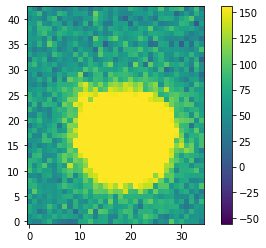

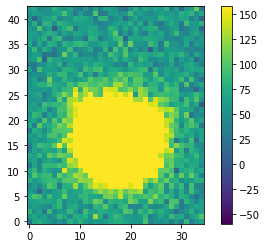

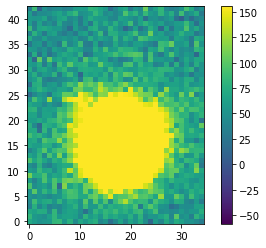

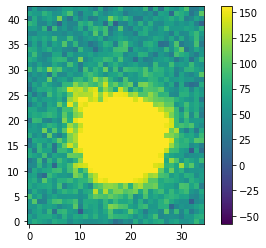

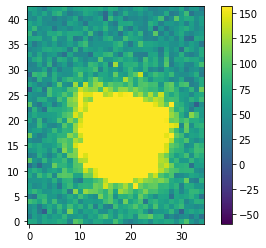

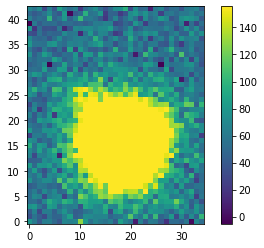

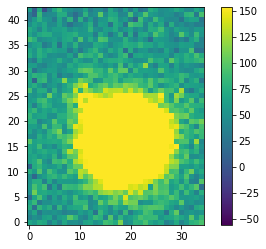

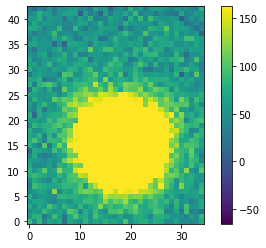

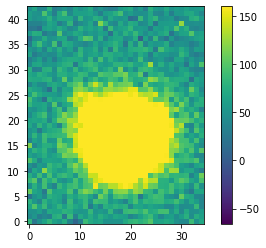

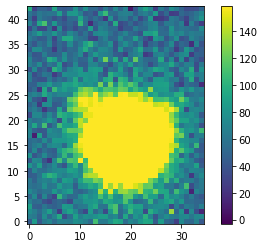

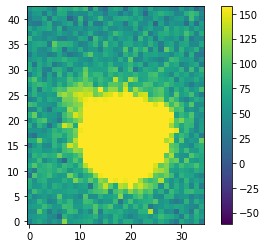

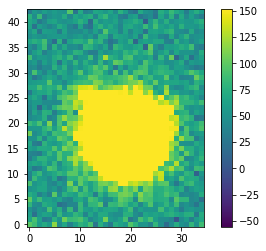

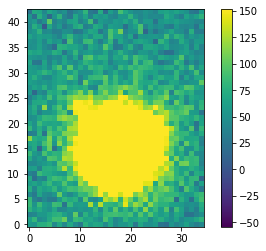

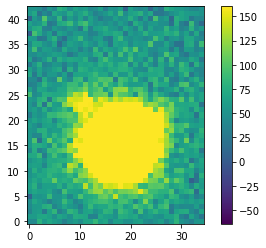

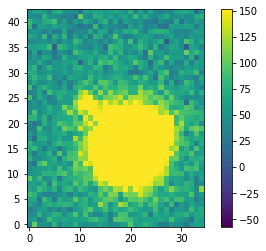

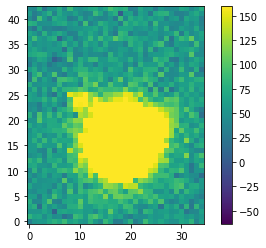

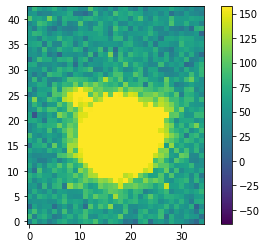

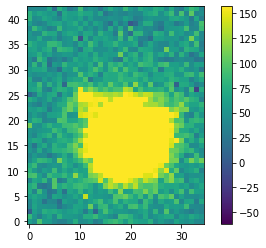

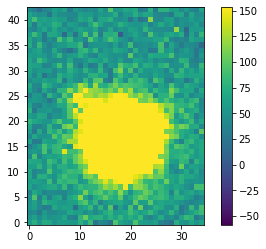

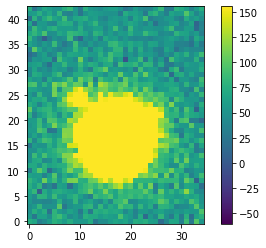

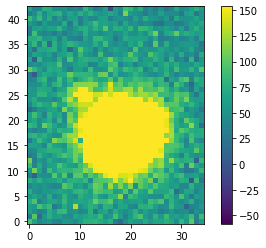

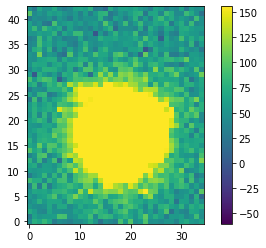

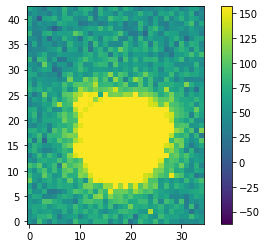

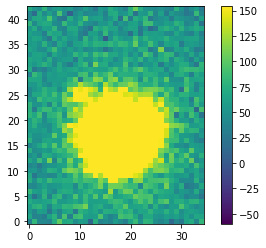

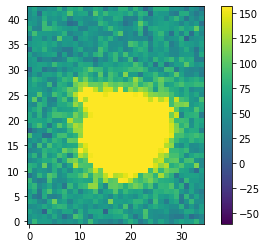

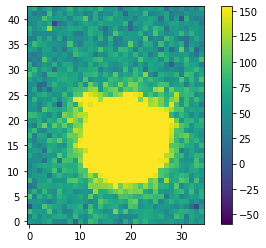

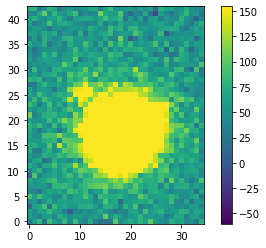

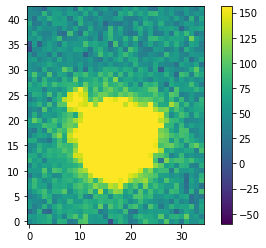

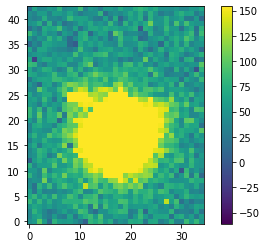

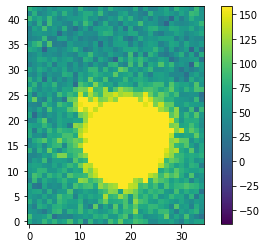

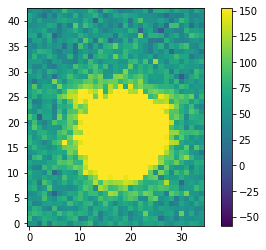

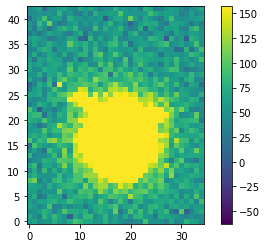

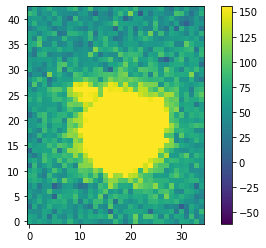

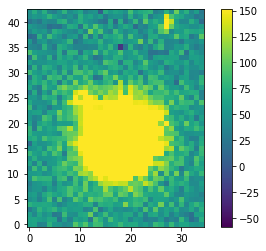

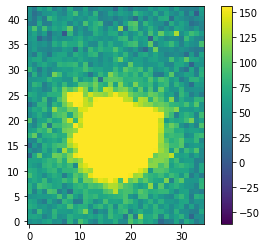

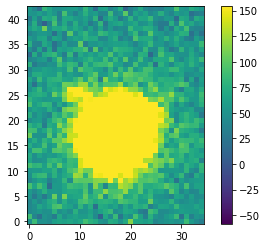

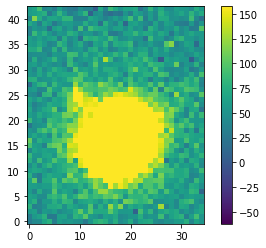

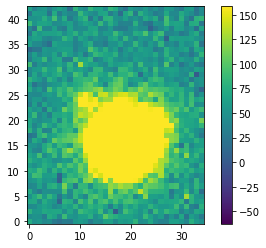

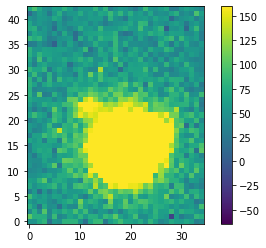

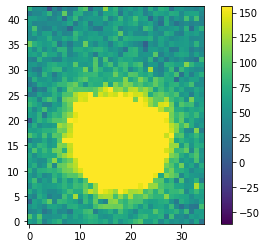

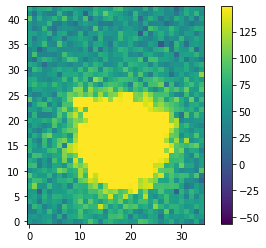

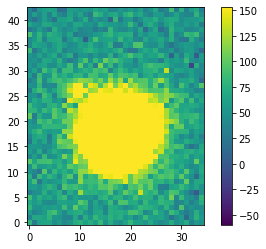

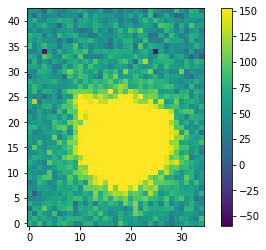

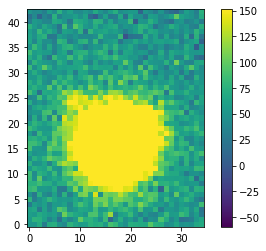

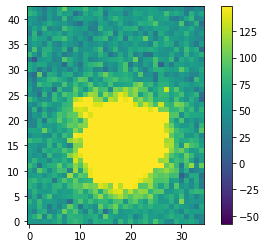

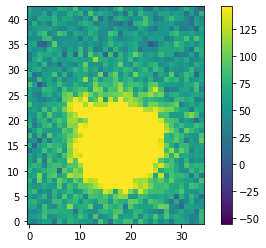

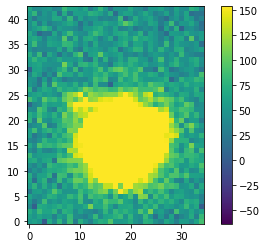

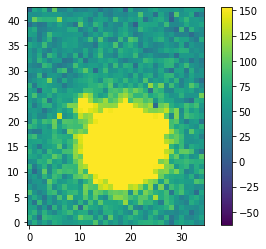

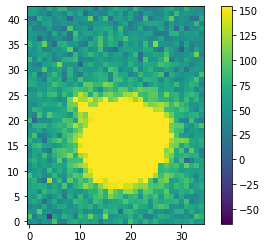

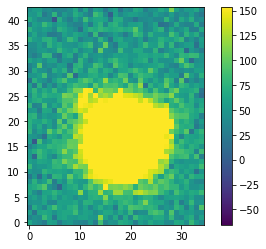

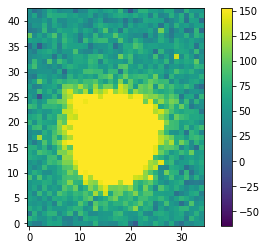

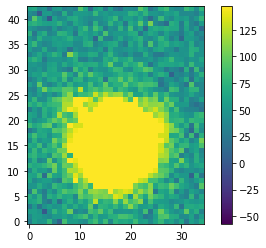

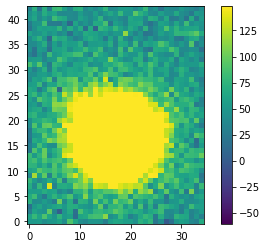

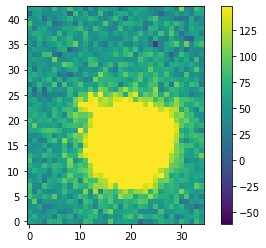

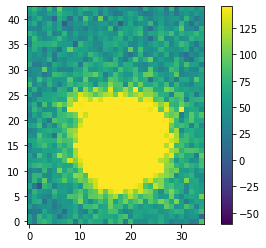

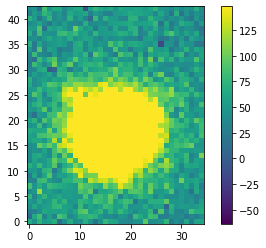

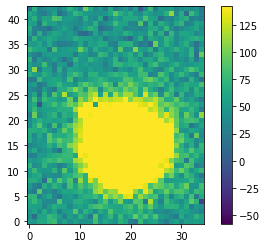

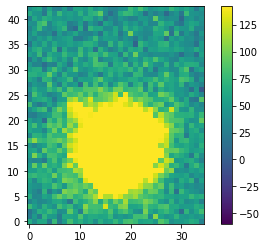

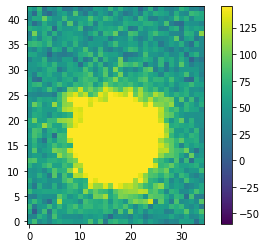

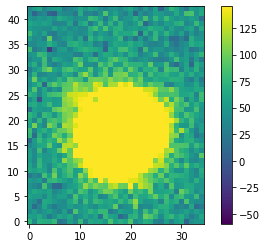

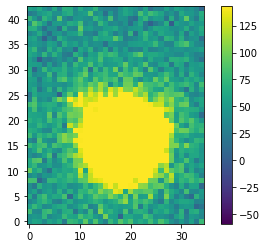

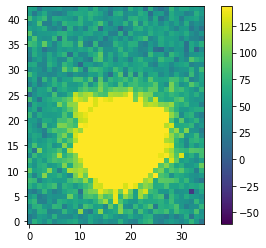

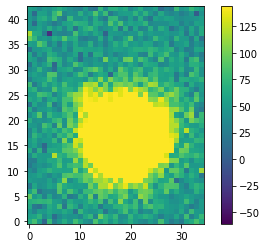

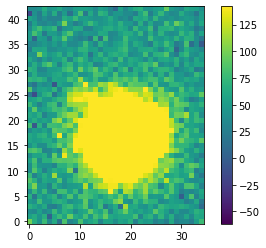

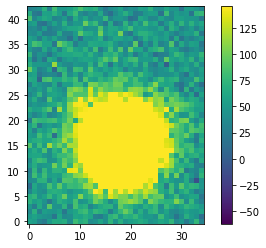

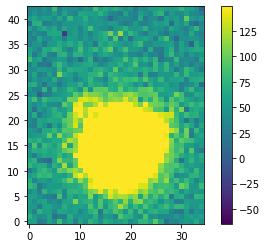

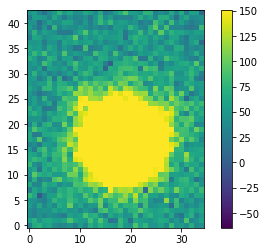

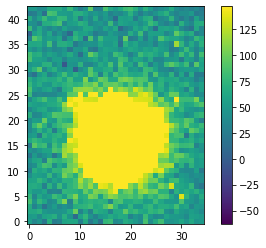

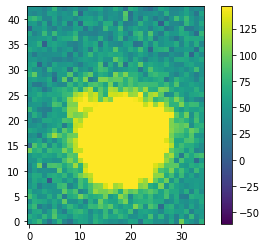

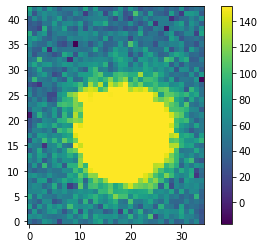

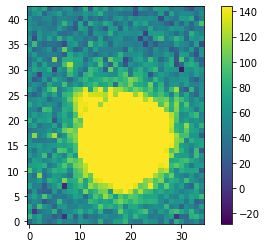

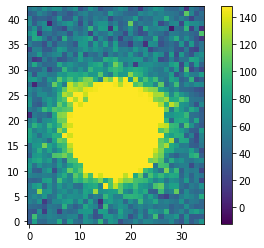

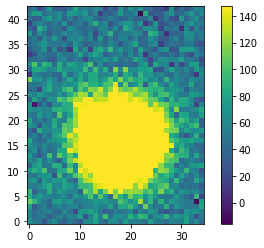

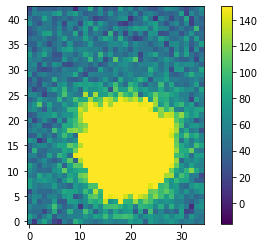

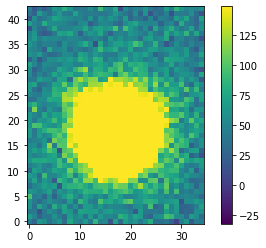

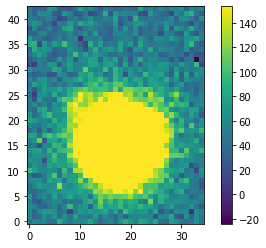

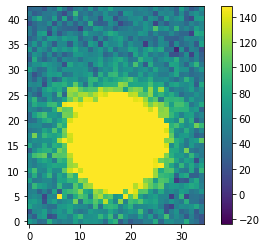

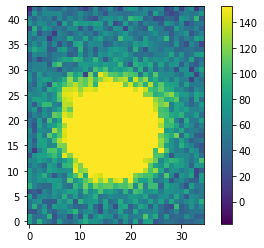

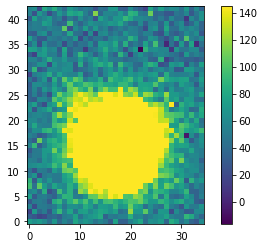

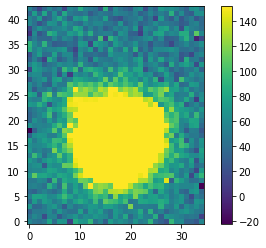

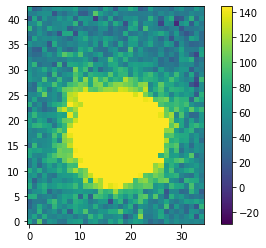

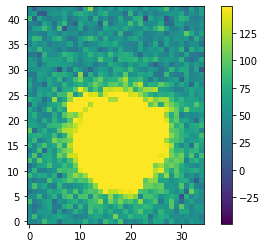

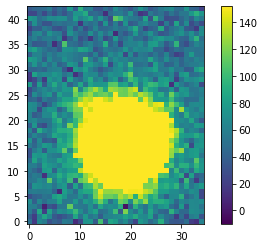

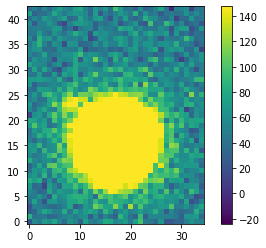

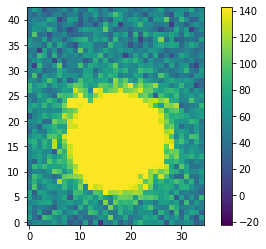

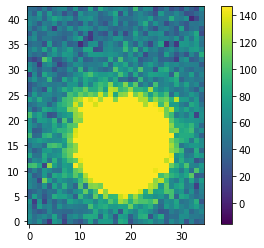

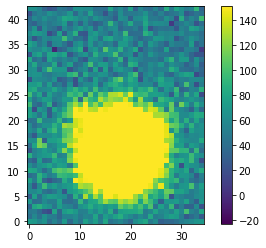

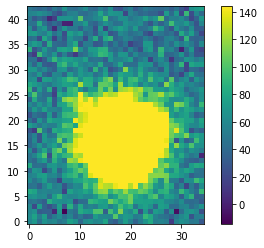

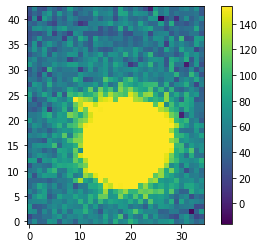

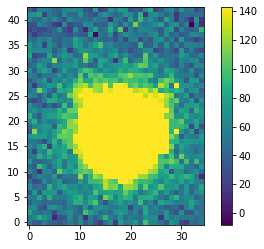

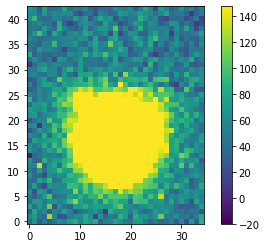

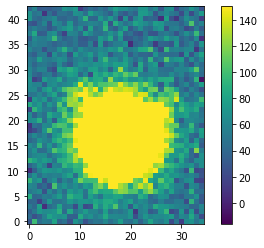

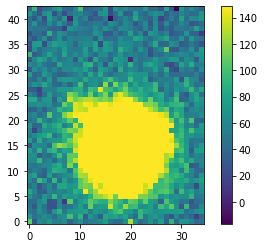

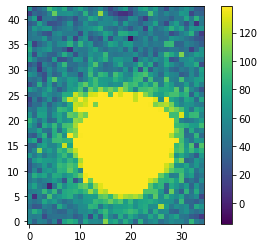

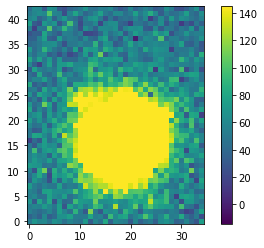

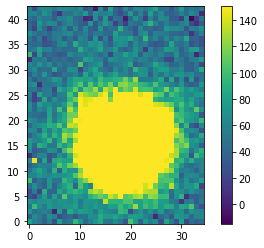

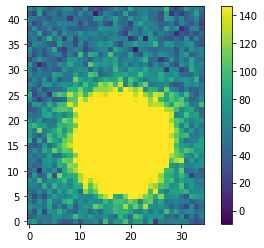

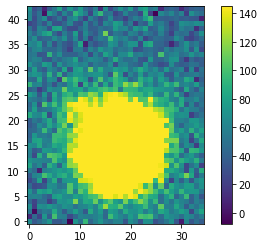

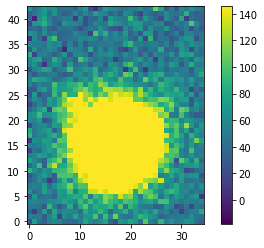

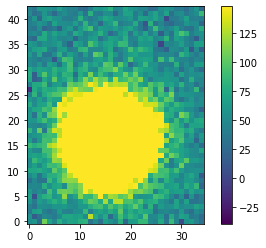

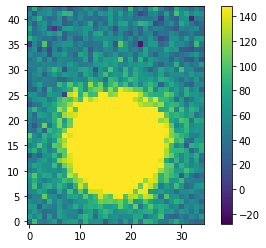

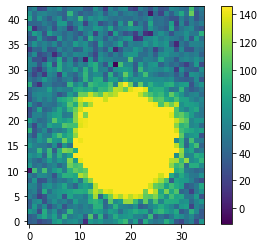

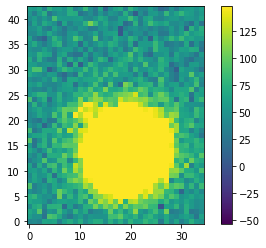

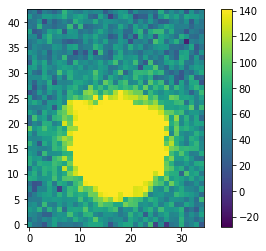

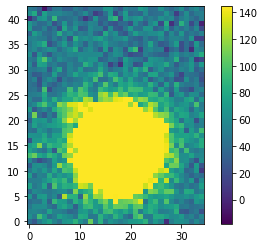

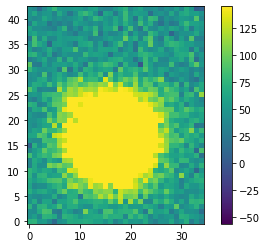

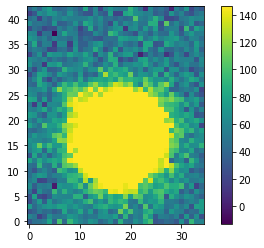

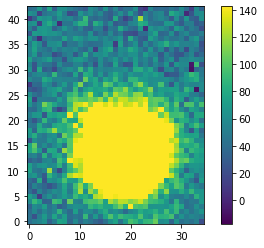

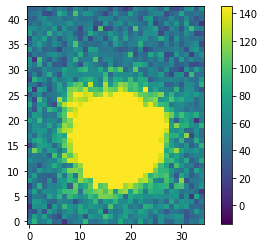

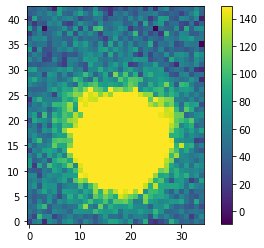

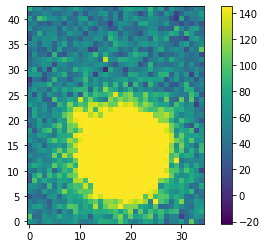

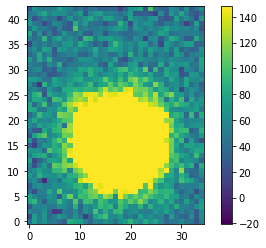

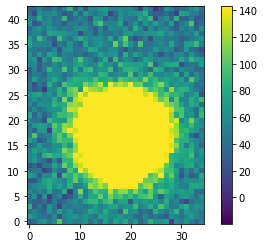

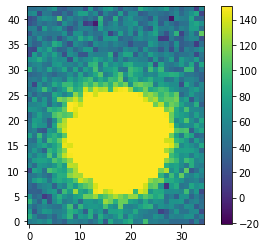

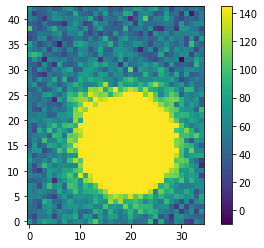

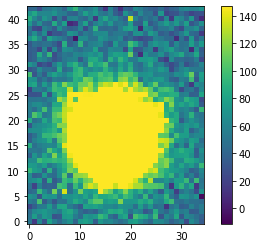

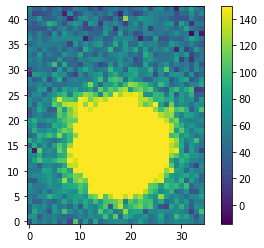

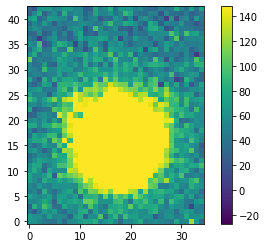

In [38]:
plotmulti(xy, contenido)